In [9]:
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib import ticker as tkr
from matplotlib.cm import get_cmap
from cycler import cycler
import numpy as np
import interpretable as inter
from scipy.optimize import curve_fit

# LaTeX page width for accurate sizing in inches
PAGE_WIDTH = 6.7
FIGSIZE = (PAGE_WIDTH, PAGE_WIDTH / 2)

# General Font settings
x = r'\usepackage[bitstream-charter, greekfamily=default]{mathdesign}'
rc('text.latex', preamble=x)
rc('text', usetex=True)
rc('font', **{'family': 'serif'})

# Font sizes (all relative to the base size defined, 12)
base = 12
rc('axes', titlesize=base - 2)
rc('legend', fontsize=base - 2)
rc('axes', labelsize=base - 2)
rc('xtick', labelsize=base - 3)
rc('ytick', labelsize=base - 3)

# Axis styles (if you want to repeat the linestyles and colors)
cycles = cycler('linestyle', ['-', '--', ':', '-.'])
cmap = get_cmap('gray')
cycles += cycler('color', cmap(list(np.linspace(0.1, 0.9, 4))))
rc('axes', prop_cycle=cycles)

$\underline{\text{Synthetic Data:}}$

$\underline{\text{SPMINI:}}$

$\underline{\text{Multiple features models:}}$

In [1]:
# kernels
%store -r GNNDPL_approx1_two_features_SPMINI
%store -r GNNDPL_approx2_two_features_SPMINI

# alphas
%store -r alphaGNNDPL_approx1_two_features_SPMINI
%store -r alphaGNNDPL_approx2_two_features_SPMINI

# returns 
% store -r returnsapproxGNNTFPL_SPMINI

# R squared
% store -r R2_PowerModelGNNTFPL_SPMINI

# Variogram
% store -r synthetic_variogram_GNNTFPL_approx_SPMINI


$\underline{\text{Single feature models:}}$

In [2]:
# kernels
% store -r G_star_SPMINI_epsilons
%store -r GNNPL_approx_SPMINI
%store -r GNNDPL_approx1_SPMINI
%store -r GNNDPL_approx2_SPMINI


# alphas
%store -r alphaGNNPL_SPMINI
%store -r alphaGNNDPL_SPMINI

# returns
% store -r returns_approx_SPMINI_epsilons
% store -r returnsapproxGNNPL_SPMINI
% store -r returnsapproxGNNDPL_SPMINI


# variograms 
% store -r synthetic_variogram_Gstar_SPMINI_approx_epsilons
% store -r synthetic_variogram_GNNPL_approx_SPMINI
% store -r synthetic_variogram_GNNDPL_approx_SPMINI


# R squared
% store -r R2_Gstar_SPMINI_approx_epsilons
% store -r R2_PowerModelGNNPL_SPMINI
% store -r R2_PowerModelGNNDPL_SPMINI



$\underline{\text{Single event model:}}$

In [3]:
# linear with order sign 
% store -r OEG_starSPMINI_epsilons
% store -r OEsynthetic_variogram_GstarSPMINI_approx_epsilons
% store -r OEnew_data_reg_SPMINI_epsilons
% store -r OER2_GstarSPMINI_approx_epsilons

$\underline{10\text{YUST}:}$

$\underline{\text{Multiple features models:}}$

In [4]:
# kernels
%store -r GNNDPL_approx1_two_features_UST
%store -r GNNDPL_approx2_two_features_UST

# alphas
%store -r alphaGNNDPL_approx1_two_features_UST
%store -r alphaGNNDPL_approx2_two_features_UST

# returns 
% store -r returnsapproxGNNTFPL_UST

# R squared
% store -r R2_PowerModelGNNTFPL_UST

# Variogram
% store -r synthetic_variogram_GNNTFPL_approx_UST


$\underline{\text{Single feature models:}}$

In [5]:
# kernels
% store -r G_star_UST_epsilons
%store -r GNNPL_approx_UST
%store -r GNNDPL_approx1_UST
%store -r GNNDPL_approx2_UST

# alphas
%store -r alphaGNNPL_UST
%store -r alphaGNNDPL_UST

# returns
% store -r returns_approx_UST_epsilons
% store -r returnsapproxGNNPL_UST
% store -r returnsapproxGNNDPL_UST

# variograms 
% store -r synthetic_variogram_Gstar_UST_approx_epsilons
% store -r synthetic_variogram_GNNPL_approx_UST
% store -r synthetic_variogram_GNNDPL_approx_UST

# R squared
% store -r R2_Gstar_UST_approx_epsilons
% store -r R2_PowerModelGNNPL_UST
% store -r R2_PowerModelGNNDPL_UST


$\underline{\text{Single event model:}}$

In [6]:
% store -r OEG_starUST_epsilons
% store -r OEsynthetic_variogram_GstarUST_approx_epsilons
% store -r OEnew_data_reg_UST_epsilons
% store -r OER2_GstarUST_approx_epsilons

$\underline{\text{Market Data:}}$

In [7]:
def fWN(row):
    if row['sign'] > 0:
        return row['ask_size_normalized']
    else:
        return row['bid_size_normalized']

In [10]:
L = 500
max_lag = 1000

%store -r dfSPMINI
%store -r dfUST

dfSPMINI['sign'] = dfSPMINI['qty_signed'].apply(lambda x: np.sign(x))
dfUST['sign'] = dfUST['qty_signed'].apply(lambda x: np.sign(x))

dfSPMINI['best_opposed_quantity_WN'] = dfSPMINI.apply(fWN, axis = 1) # we select the best opposed qtys with normalization
dfUST['best_opposed_quantity_WN'] = dfUST.apply(fWN, axis = 1) # we select the best opposed qtys with normalization

dfSPMINI['quotient_trades_best_opposed_WN'] = dfSPMINI['qty_signed_normalized'].abs().div(dfSPMINI['best_opposed_quantity_WN'].mean()) # quotient with normalized data
dfUST['quotient_trades_best_opposed_WN'] = dfUST['qty_signed_normalized'].abs().div(dfUST['best_opposed_quantity_WN'].mean()) # quotient with normalized data

## SPMINI
# autocovariance
% store -r acf_epsilonsSPMINI
% store -r acf_returnsSPMINI
% store -r acf_price_changing_trades_SPMINI

# response
% store -r ResSPMINI

# signature plot + variogram
% store -r VarioSPMINI

## 10YUST

# autocovariance
% store -r acf_epsilonsUST
% store -r acf_returnsUST
% store -r acf_price_changing_trades_UST

# response
% store -r ResUST

# signature plot + variogram
% store -r VarioUST



$\underline{\text{Graphs:}}$

$\underline{\text{MD Sylized facts:}}$

In [11]:
def curve_fittingPL(v,a,b):
    return a*np.power(v,-b)

def curve_fittingExpo(v,a,b):
    return a*np.exp(-b*v)

In [12]:
params11, cov = curve_fit(curve_fittingPL, np.arange(1,max_lag+1), acf_epsilonsSPMINI[1:].values )
appro11 = curve_fittingPL(np.arange(1,max_lag+1), *params11)

params12, cov = curve_fit(curve_fittingPL, np.arange(1,max_lag+1), acf_epsilonsUST[1:].values )
appro12 = curve_fittingPL(np.arange(1,max_lag+1), *params12)

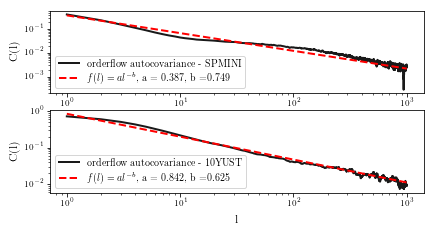

In [13]:
# plot
fig1, (ax1) = plt.subplots(2, 1, figsize=FIGSIZE)

ax1[0].plot(np.arange(1,max_lag+1), acf_epsilonsSPMINI[1:], linewidth=2, label ='orderflow autocovariance - SPMINI')
ax1[0].plot(np.arange(1,max_lag+1), appro11[:max_lag], '--r', linewidth=2, 
label = r'$f(l) = al^{-b}$' + ', a = ' + str(params11[0])[:5] + ', b =' + str(params11[1])[:5] )
ax1[0].set_xlabel('l', fontsize=13)
ax1[0].set_ylabel('C(l)', fontsize=13)
ax1[0].legend()
ax1[0].set_xscale('log')
ax1[0].set_yscale('log')

ax1[1].plot(np.arange(1,max_lag+1), acf_epsilonsUST[1:], linewidth=2, label ='orderflow autocovariance - 10YUST')
ax1[1].plot(np.arange(1,max_lag+1), appro12[:max_lag], '--r', linewidth=2, 
label = r'$f(l) = al^{-b}$' + ', a = ' + str(params12[0])[:5] + ', b =' + str(params12[1])[:5] )
ax1[1].set_xlabel('l', fontsize=13)
ax1[1].set_ylabel('C(l)', fontsize=13)
ax1[1].legend()
ax1[1].set_xscale('log')
ax1[1].set_yscale('log')

plt.savefig('GraphsMD/MarketDataAutocorrelation', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

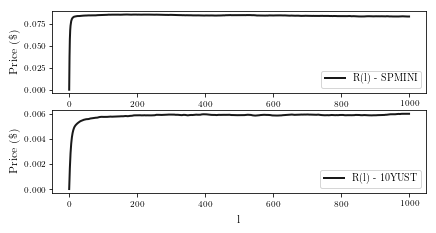

In [14]:
# plot
fig2, (ax2) = plt.subplots(2, 1, figsize=FIGSIZE)

ax2[0].plot(np.arange(max_lag+2), ResSPMINI, linewidth=2, label ='R(l) - SPMINI')
ax2[0].set_xlabel('l', fontsize=13)
ax2[0].set_ylabel('Price (\$)', fontsize=13)
ax2[0].legend()

ax2[1].plot(np.arange(max_lag+2), ResUST, linewidth=2, label ='R(l) - 10YUST')
ax2[1].set_xlabel('l', fontsize=13)
ax2[1].set_ylabel('Price (\$)', fontsize=13)
ax2[1].legend()

plt.savefig('GraphsMD/MarketDataResponse', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

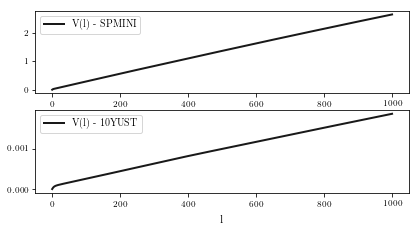

In [15]:
# plot
fig2, (ax2) = plt.subplots(2, 1, figsize=FIGSIZE)

ax2[0].plot(np.arange(max_lag), VarioSPMINI, linewidth=2, label ='V(l) - SPMINI')
ax2[0].set_xlabel('l', fontsize=13)
ax2[0].legend()

ax2[1].plot(np.arange(max_lag), VarioUST, linewidth=2, label ='V(l) - 10YUST')
ax2[1].set_xlabel('l', fontsize=13)
ax2[1].legend()

plt.savefig('GraphsMD/MarketDataVariogram', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

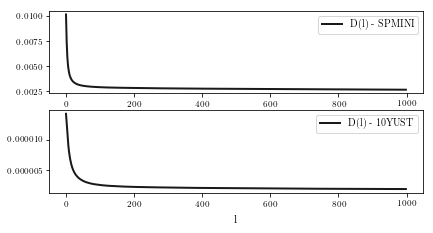

In [16]:
# plot
fig2, (ax2) = plt.subplots(2, 1, figsize=FIGSIZE)

ax2[0].plot(np.arange(max_lag-1), VarioSPMINI[1:]/np.arange(1,max_lag), linewidth=2, label ='D(l) - SPMINI')
ax2[0].set_xlabel('l', fontsize=13)
ax2[0].legend()

ax2[1].plot(np.arange(max_lag-1), VarioUST[1:]/np.arange(1,max_lag), linewidth=2, label ='D(l) - 10YUST')
ax2[1].set_xlabel('l', fontsize=13)
ax2[1].legend()

plt.savefig('GraphsMD/MarketDataSignaturePlot', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

$\underline{\text{Mutli event models}}$

$\underline{\text{RegLin model with }F(u) = sign(u):}$

In [17]:
params21, cov = curve_fit(curve_fittingPL, np.arange(5,L), G_star_SPMINI_epsilons[5:L] )
appro21 = curve_fittingPL(np.arange(1,L), *params21)

params22, cov = curve_fit(curve_fittingPL, np.arange(5,L), G_star_UST_epsilons[5:L] )
appro22 = curve_fittingPL(np.arange(1,L), *params22)

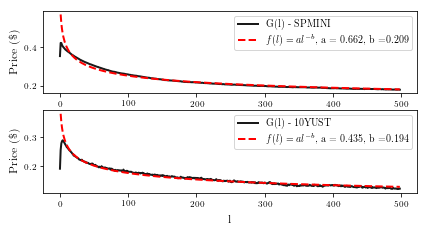

In [18]:
# plot
fig5, (ax5) = plt.subplots(2, 1, figsize=FIGSIZE)

ax5[0].plot(np.arange(L-1), G_star_SPMINI_epsilons[1:L], linewidth=2, label ='G(l) - SPMINI')
ax5[0].plot(np.arange(1,L-1), appro21[1:L], '--r', linewidth=2, 
label = r'$f(l) = al^{-b}$' + ', a = ' + str(params21[0])[:5] + ', b =' + str(params21[1])[:5] )
ax5[0].set_xlabel('l', fontsize=13)
ax5[0].set_ylabel('Price (\$)', fontsize=13)
ax5[0].legend()

ax5[1].plot(np.arange(L-1), G_star_UST_epsilons[1:L], linewidth=2, label ='G(l) - 10YUST')
ax5[1].plot(np.arange(1,L-1), appro22[1:L], '--r', linewidth=2, 
label = r'$f(l) = al^{-b}$' + ', a = ' + str(params22[0])[:5] + ', b =' + str(params22[1])[:5] )
ax5[1].set_xlabel('l', fontsize=13)
ax5[1].set_ylabel('Price (\$)', fontsize=13)
ax5[1].legend()

plt.savefig('GraphsMD/SyntheticDataKernelEpsilons', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

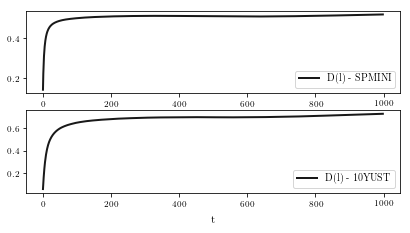

In [19]:
# plot
fig3, (ax3) = plt.subplots(2, 1, figsize=FIGSIZE)

ax3[0].plot(np.arange(max_lag-1), synthetic_variogram_Gstar_SPMINI_approx_epsilons[1:]/np.arange(1,max_lag), linewidth=2, label ='D(l) - SPMINI')
ax3[0].set_xlabel('t', fontsize=13)
ax3[0].legend()

ax3[1].plot(np.arange(max_lag-1), synthetic_variogram_Gstar_UST_approx_epsilons[1:]/np.arange(1,max_lag), linewidth=2, label ='D(l) - 10YUST')
ax3[1].set_xlabel('t', fontsize=13)
ax3[1].legend()

plt.savefig('GraphsMD/SyntheticDataSignaturePlotEpsilons', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

In [20]:
print('R^2 train (returns - SPMINI): %.3f' % R2_Gstar_SPMINI_approx_epsilons )
print('R^2 train (returns - 10YUST): %.3f' % R2_Gstar_UST_approx_epsilons )

R^2 train (returns - SPMINI): 0.143
R^2 train (returns - 10YUST): 0.063


$\underline{\text{RegLin model with F(u) = u:}}$

In [15]:
params31, cov = curve_fit(curve_fittingPL, np.arange(5,L), GOW_approx[5:L] )
appro31 = curve_fittingPL(np.arange(1,L), *params31)

params32, cov = curve_fit(curve_fittingPL, np.arange(5,L), GOW_approx_USB[5:L] )
appro32 = curve_fittingPL(np.arange(1,L), *params32)

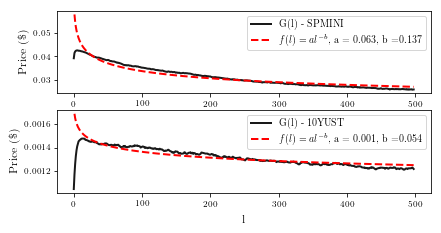

In [16]:
# plot
fig5, (ax5) = plt.subplots(2, 1, figsize=FIGSIZE)

ax5[0].plot(np.arange(L-1), GOW_approx[1:L], linewidth=2, label ='G(l) - SPMINI')
ax5[0].plot(np.arange(1,L-1), appro31[1:L], '--r', linewidth=2, 
label = r'$f(l) = al^{-b}$' + ', a = ' + str(params31[0])[:5] + ', b =' + str(params31[1])[:5] )
ax5[0].set_xlabel('l', fontsize=13)
ax5[0].set_ylabel('Price (\$)', fontsize=13)
ax5[0].legend()

ax5[1].plot(np.arange(L-1), GOW_approx_USB[1:L], linewidth=2, label ='G(l) - 10YUST')
ax5[1].plot(np.arange(1,L-1), appro32[1:L], '--r', linewidth=2, 
label = r'$f(l) = al^{-b}$' + ', a = ' + str(params32[0])[:5] + ', b =' + str(params32[1])[:5] )
ax5[1].set_xlabel('l', fontsize=13)
ax5[1].set_ylabel('Price (\$)', fontsize=13)
ax5[1].legend()

plt.savefig('GraphsMD/SyntheticDataKernelOW', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

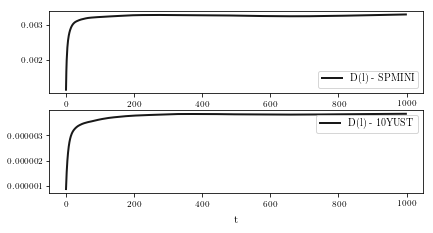

In [17]:
# plot
fig3, (ax3) = plt.subplots(2, 1, figsize=FIGSIZE)

ax3[0].plot(np.arange(max_lag-1), synthetic_variogram_GOW_approx[1:]/np.arange(1,max_lag), linewidth=2, label ='D(l) - SPMINI')
ax3[0].set_xlabel('t', fontsize=13)
ax3[0].legend()

ax3[1].plot(np.arange(max_lag-1), synthetic_variogram_GOW_approx_USB[1:]/np.arange(1,max_lag), linewidth=2, label ='D(l) - 10YUST')
ax3[1].set_xlabel('t', fontsize=13)
ax3[1].legend()


plt.savefig('GraphsMD/SyntheticSignaturePlotOW', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

In [18]:
print('R^2 train (returns - SPMINI): %.3f' % R2_OWModel )
print('R^2 train (returns - 10YUST): %.3f' % R2_OWModel_USB )

R^2 train (returns - SPMINI): 0.096
R^2 train (returns - 10YUST): 0.063


$\underline{\text{RegLin model with one kernel and }F(u) = u^{\delta}:}$

In [25]:
params41, cov = curve_fit(curve_fittingPL, np.arange(5,L), GNNPL_approx_SPMINI[5:L] )
appro41 = curve_fittingPL(np.arange(1,L), *params41)

params42, cov = curve_fit(curve_fittingPL, np.arange(5,L), GNNPL_approx_UST[5:L] )
appro42 = curve_fittingPL(np.arange(1,L), *params42)

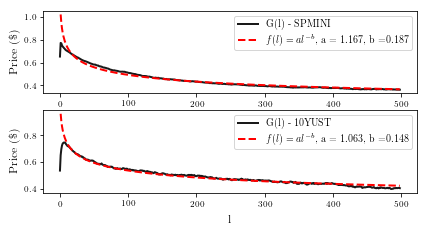

In [26]:
# plot
fig5, (ax5) = plt.subplots(2, 1, figsize=FIGSIZE)

ax5[0].plot(np.arange(L-1), GNNPL_approx_SPMINI[1:L], linewidth=2, label ='G(l) - SPMINI')
ax5[0].plot(np.arange(1,L-1), appro41[1:L], '--r', linewidth=2, 
label = r'$f(l) = al^{-b}$' + ', a = ' + str(params41[0])[:5] + ', b =' + str(params41[1])[:5] )
ax5[0].set_xlabel('l', fontsize=13)
ax5[0].set_ylabel('Price (\$)', fontsize=13)
ax5[0].legend()

ax5[1].plot(np.arange(L-1), GNNPL_approx_UST[1:L], linewidth=2, label ='G(l) - 10YUST')
ax5[1].plot(np.arange(1,L-1), appro42[1:L], '--r', linewidth=2, 
label = r'$f(l) = al^{-b}$' + ', a = ' + str(params42[0])[:5] + ', b =' + str(params42[1])[:5] )
ax5[1].set_xlabel('l', fontsize=13)
ax5[1].set_ylabel('Price (\$)', fontsize=13)
ax5[1].legend()

plt.savefig('GraphsMD/SyntheticDataKernelsNNPL', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

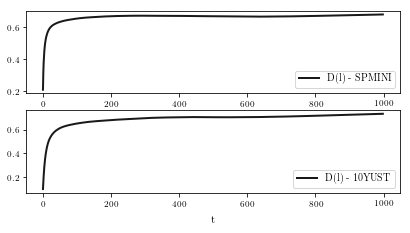

In [27]:
# plot
fig3, (ax3) = plt.subplots(2, 1, figsize=FIGSIZE)

ax3[0].plot(np.arange(max_lag-1), synthetic_variogram_GNNPL_approx_SPMINI[1:]/np.arange(1,max_lag), linewidth=2, label ='D(l) - SPMINI')
ax3[0].set_xlabel('t', fontsize=13)
ax3[0].legend()

ax3[1].plot(np.arange(max_lag-1), synthetic_variogram_GNNPL_approx_UST[1:]/np.arange(1,max_lag), linewidth=2, label ='D(l) - 10YUST')
ax3[1].set_xlabel('t', fontsize=13)
ax3[1].legend()


plt.savefig('GraphsMD/SyntheticDataSignaturePlotNNPL', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

In [28]:
print('R^2 train (returns - SPMINI): %.3f' % R2_PowerModelGNNPL_SPMINI)
print('R^2 train (returns - 10YUST): %.3f' % R2_PowerModelGNNPL_UST)

R^2 train (returns - SPMINI): 0.175
R^2 train (returns - 10YUST): 0.097


$\underline{\text{RegLin model with two kernels and }F_{1}(u) = u^{\delta_{1}} \text{ and } F_{2}(u) = u^{\delta_{2}}:}$

In [29]:
params51, cov = curve_fit(curve_fittingPL, np.arange(5,L), GNNDPL_approx1_SPMINI[5:L] )
appro51 = curve_fittingPL(np.arange(1,L), *params51)

params52, cov = curve_fit(curve_fittingPL, np.arange(5,L), GNNDPL_approx2_SPMINI[5:L] )
appro52 = curve_fittingPL(np.arange(1,L), *params52)

params53, cov = curve_fit(curve_fittingPL, np.arange(5,L), GNNDPL_approx1_UST[5:L] )
appro53 = curve_fittingPL(np.arange(1,L), *params53)

params54, cov = curve_fit(curve_fittingPL, np.arange(5,L), GNNDPL_approx2_UST[5:L] )
appro54 = curve_fittingPL(np.arange(1,L), *params54)

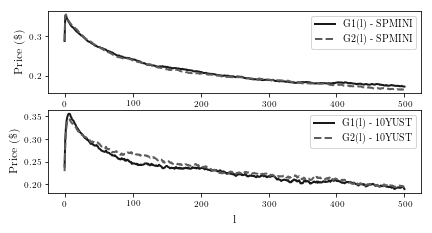

In [30]:
# plot GNNDPL_approx1
fig5, (ax5) = plt.subplots(2, 1, figsize=FIGSIZE)

ax5[0].plot(np.arange(L+1), GNNDPL_approx1_SPMINI[1:], linewidth=2, label ='G1(l) - SPMINI')
ax5[0].plot(np.arange(L+1), GNNDPL_approx2_SPMINI[1:], linewidth=2, label ='G2(l) - SPMINI')
#ax5[0].plot(np.arange(L+1), (GNNDPL_approx2[1:]+GNNDPL_approx2[1:])/2, linewidth=2, label ='(G1(l)+G2(l))/2 ')
#ax5[0].plot(np.arange(1,L-1), appro51[1:L], '--r', linewidth=2, 
#label = r'$f(l) = al^{-b}$' + ', a = ' + str(params51[0])[:5] + ', b =' + str(params51[1])[:5] )
#ax5[0].plot(np.arange(1,L-1), appro52[1:L], '--r', linewidth=2, 
#label = r'$f(l) = al^{-b}$' + ', a = ' + str(params52[0])[:5] + ', b =' + str(params52[1])[:5] )
ax5[0].set_xlabel('l', fontsize=13)
ax5[0].set_ylabel('Price (\$)', fontsize=13)
ax5[0].legend()

ax5[1].plot(np.arange(L+1), GNNDPL_approx1_UST[1:], linewidth=2, label ='G1(l) - 10YUST')
ax5[1].plot(np.arange(L+1), GNNDPL_approx2_UST[1:], linewidth=2, label ='G2(l) - 10YUST')
#ax5[1].plot(np.arange(L+1), (GNNDPL_approx2[1:]+GNNDPL_approx2[1:])/2, linewidth=2, label ='(G1(l)+G2(l))/2 ')
#ax5[1].plot(np.arange(1,L-1), appro53[1:L], '--r', linewidth=2, 
#label = r'$f(l) = al^{-b}$' + ', a = ' + str(params53[0])[:5] + ', b =' + str(params53[1])[:5] )
#ax5[1].plot(np.arange(1,L-1), appro52[1:L], '--r', linewidth=2, 
#label = r'$f(l) = al^{-b}$' + ', a = ' + str(params54[0])[:5] + ', b =' + str(params54[1])[:5] )
ax5[1].set_xlabel('l', fontsize=13)
ax5[1].set_ylabel('Price (\$)', fontsize=13)
ax5[1].legend()

plt.savefig('GraphsMD/SyntheticDataKernelsNNDPL', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

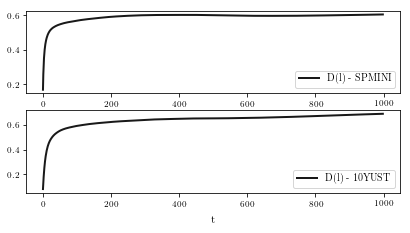

In [31]:
# plot
fig3, (ax3) = plt.subplots(2, 1, figsize=FIGSIZE)

ax3[0].plot(np.arange(max_lag-1), synthetic_variogram_GNNDPL_approx_SPMINI[1:]/np.arange(1,max_lag), linewidth=2, label ='D(l) - SPMINI')
ax3[0].set_xlabel('t', fontsize=13)
ax3[0].legend()

ax3[1].plot(np.arange(max_lag-1), synthetic_variogram_GNNDPL_approx_UST[1:]/np.arange(1,max_lag), linewidth=2, label ='D(l) - 10YUST')
ax3[1].set_xlabel('t', fontsize=13)
ax3[1].legend()


plt.savefig('GraphsMD/SyntheticSignaturePlotNNDPL', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

In [32]:
print('R^2 train (returns - SPMINI): %.3f' % R2_PowerModelGNNDPL_SPMINI)
print('R^2 train (returns - 10YUST): %.3f' % R2_PowerModelGNNDPL_UST)

R^2 train (returns - SPMINI): 0.175
R^2 train (returns - 10YUST): 0.096


$\underline{\text{RegLin model with }F(u) = \log(1+u):}$

In [27]:
params61, cov = curve_fit(curve_fittingPL, np.arange(5,L), Glog_approx[5:L] )
appro61 = curve_fittingPL(np.arange(1,L), *params61)

params62, cov = curve_fit(curve_fittingPL, np.arange(5,L), Glog_approx_USB[5:L] )
appro62 = curve_fittingPL(np.arange(1,L), *params62)

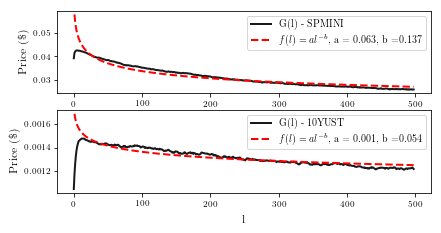

In [28]:
# plot
fig5, (ax5) = plt.subplots(2, 1, figsize=FIGSIZE)

ax5[0].plot(np.arange(L-1), Glog_approx[1:L], linewidth=2, label ='G(l) - SPMINI')
ax5[0].plot(np.arange(1,L-1), appro61[1:L], '--r', linewidth=2, 
label = r'$f(l) = al^{-b}$' + ', a = ' + str(params61[0])[:5] + ', b =' + str(params61[1])[:5] )
ax5[0].set_xlabel('l', fontsize=13)
ax5[0].set_ylabel('Price (\$)', fontsize=13)
ax5[0].legend()

ax5[1].plot(np.arange(L-1), Glog_approx_USB[1:L], linewidth=2, label ='G(l) - 10YUST')
ax5[1].plot(np.arange(1,L-1), appro62[1:L], '--r', linewidth=2, 
label = r'$f(l) = al^{-b}$' + ', a = ' + str(params62[0])[:5] + ', b =' + str(params62[1])[:5] )
ax5[1].set_xlabel('l', fontsize=13)
ax5[1].set_ylabel('Price (\$)', fontsize=13)
ax5[1].legend()

plt.savefig('GraphsMD/SyntheticDataKernelsLog', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

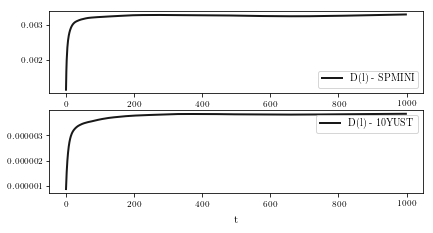

In [29]:
# plot
fig3, (ax3) = plt.subplots(2, 1, figsize=FIGSIZE)

ax3[0].plot(np.arange(max_lag-1), synthetic_variogram_Glog_approx[1:]/np.arange(1,max_lag), linewidth=2, label ='D(l) - SPMINI')
ax3[0].set_xlabel('t', fontsize=13)
ax3[0].legend()

ax3[1].plot(np.arange(max_lag-1), synthetic_variogram_Glog_approx_USB[1:]/np.arange(1,max_lag), linewidth=2, label ='D(l) - 10YUST')
ax3[1].set_xlabel('t', fontsize=13)
ax3[1].legend()

plt.savefig('GraphsMD/SyntheticDataSignaturePlotNNDPL', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

In [30]:
print('R^2 train (returns - SPMINI): %.3f' % R2_LogModel)
print('R^2 train (returns - 10YUST): %.3f' % R2_LogModel_USB)

R^2 train (returns - SPMINI): 0.096
R^2 train (returns - 10YUST): 0.063


$\underline{\text{Single event models}}$

$\underline{\text{linear with order sign}}$

In [33]:
print('for SPMINI G(1) = ', str(OEG_starSPMINI_epsilons.values[1]))
print('for 10YUST G(1) = ', str(OEG_starUST_epsilons.values[1]))

for SPMINI G(1) =  0.37584306337101936
for 10YUST G(1) =  0.2403305882490774


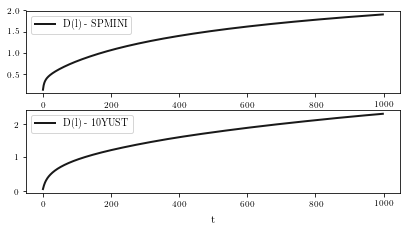

In [34]:
# plot
fig3, (ax3) = plt.subplots(2, 1, figsize=FIGSIZE)

ax3[0].plot(np.arange(max_lag-1), OEsynthetic_variogram_GstarSPMINI_approx_epsilons[1:]/np.arange(1,max_lag), linewidth=2, label ='D(l) - SPMINI')
ax3[0].set_xlabel('t', fontsize=13)
ax3[0].legend()

ax3[1].plot(np.arange(max_lag-1), OEsynthetic_variogram_GstarUST_approx_epsilons[1:]/np.arange(1,max_lag), linewidth=2, label ='D(l) - 10YUST')
ax3[1].set_xlabel('t', fontsize=13)
ax3[1].legend()

plt.savefig('GraphsMD/SyntheticDataSignaturePlotOEepsilons', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

In [35]:
print('R^2 train (returns - SPMINI): %.3f' % OER2_GstarSPMINI_approx_epsilons)
print('R^2 train (returns - 10YUST): %.3f' % OER2_GstarUST_approx_epsilons)

R^2 train (returns - SPMINI): 0.138
R^2 train (returns - 10YUST): 0.057


$\underline{\text{Multiple features events:}}$

In [36]:
params71, cov = curve_fit(curve_fittingPL, np.arange(5,L), GNNDPL_approx1_two_features_SPMINI[5:L] )
appro71 = curve_fittingPL(np.arange(1,L), *params71)

params72, cov = curve_fit(curve_fittingPL, np.arange(5,L), GNNDPL_approx2_two_features_SPMINI[5:L] )
appro72 = curve_fittingPL(np.arange(1,L), *params72)

params73, cov = curve_fit(curve_fittingPL, np.arange(5,L), GNNDPL_approx1_two_features_UST[5:L] )
appro73 = curve_fittingPL(np.arange(1,L), *params73)

params74, cov = curve_fit(curve_fittingPL, np.arange(5,L), GNNDPL_approx2_two_features_UST[5:L] )
appro74 = curve_fittingPL(np.arange(1,L), *params74)

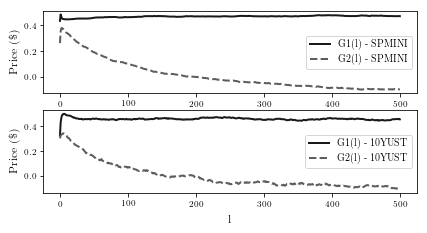

In [37]:
# plot GNNDPL_approx1
fig5, (ax5) = plt.subplots(2, 1, figsize=FIGSIZE)

ax5[0].plot(np.arange(L+1), GNNDPL_approx1_two_features_SPMINI[1:], linewidth=2, label ='G1(l) - SPMINI')
ax5[0].plot(np.arange(L+1), GNNDPL_approx2_two_features_SPMINI[1:], linewidth=2, label ='G2(l) - SPMINI')
ax5[0].set_xlabel('l', fontsize=13)
ax5[0].set_ylabel('Price (\$)', fontsize=13)
ax5[0].legend()

ax5[1].plot(np.arange(L+1), GNNDPL_approx1_two_features_UST[1:], linewidth=2, label ='G1(l) - 10YUST')
ax5[1].plot(np.arange(L+1), GNNDPL_approx2_two_features_UST[1:], linewidth=2, label ='G2(l) - 10YUST')
ax5[1].set_xlabel('l', fontsize=13)
ax5[1].set_ylabel('Price (\$)', fontsize=13)
ax5[1].legend()

plt.savefig('GraphsMD/SyntheticDataKernelsTFPL', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

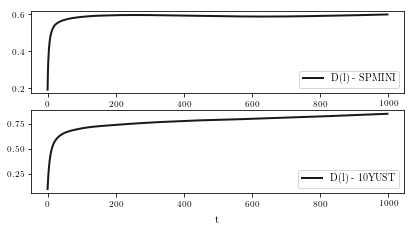

In [39]:
# plot
fig5, (ax5) = plt.subplots(2, 1, figsize=FIGSIZE)

ax5[0].plot(np.arange(max_lag-1), synthetic_variogram_GNNTFPL_approx_SPMINI[1:]/np.arange(1,max_lag), linewidth=2, label ='D(l) - SPMINI')
ax5[0].set_xlabel('t', fontsize=13)
ax5[0].legend()

ax5[1].plot(np.arange(max_lag-1), synthetic_variogram_GNNTFPL_approx_UST[1:]/np.arange(1,max_lag), linewidth=2, label ='D(l) - 10YUST')
ax5[1].set_xlabel('t', fontsize=13)
ax5[1].legend()

plt.savefig('GraphsMD/SyntheticDataSignaturePlotTFPL', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

In [40]:
print('R^2 train (returns - SPMINI): %.3f' %  R2_PowerModelGNNTFPL_SPMINI)
print('R^2 train (returns - 10YUST): %.3f' %  R2_PowerModelGNNTFPL_UST)

R^2 train (returns - SPMINI): 0.220
R^2 train (returns - 10YUST): 0.122


$\underline{\text{Signature plots}}$

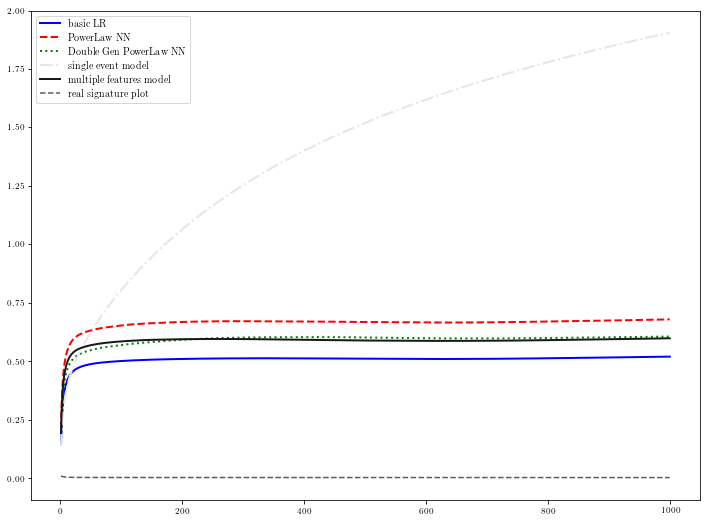

In [41]:
fig, (ax1) = plt.subplots(1, 1, figsize = [12,9])

ax1.plot(np.arange(1,max_lag), synthetic_variogram_Gstar_SPMINI_approx_epsilons[1:]/np.arange(1,max_lag), 'b', linewidth=2, label ='basic LR')
ax1.plot(np.arange(1,max_lag), synthetic_variogram_GNNPL_approx_SPMINI[1:]/np.arange(1,max_lag), 'r', linewidth=2, label ='PowerLaw NN')
ax1.plot(np.arange(1,max_lag), synthetic_variogram_GNNDPL_approx_SPMINI[1:]/np.arange(1,max_lag), 'g', linewidth=2, label ='Double Gen PowerLaw NN')
#ax1.plot(np.arange(1,max_lag), synthetic_variogram_GOW_approx[1:]/np.arange(1,max_lag), 'y', linewidth=2, label ='OW impact function gen NN')
#ax1.plot(np.arange(1,max_lag), synthetic_variogram_Glog_approx[1:]/np.arange(1,max_lag), linewidth=2, label ='Log impact function gen NN')
ax1.plot(np.arange(1,max_lag), OEsynthetic_variogram_GstarSPMINI_approx_epsilons[1:]/np.arange(1,max_lag), linewidth=2, label ='single event model')
ax1.plot(np.arange(1,max_lag), synthetic_variogram_GNNTFPL_approx_SPMINI[1:]/np.arange(1,max_lag), linewidth=2, label ='multiple features model')



ax1.plot(np.arange(1,max_lag), VarioSPMINI[1:]/np.arange(1,max_lag), label = 'real signature plot')

#ax1.set_ylim((-1e-4,1.2e-2))
ax1.legend()
plt.savefig('GraphsMD/comparison_signature_plots_SPMINI', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)

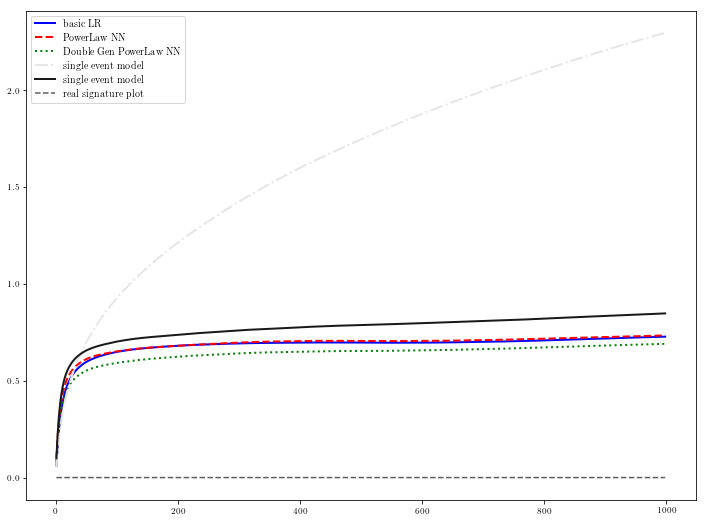

In [42]:
fig, (ax1) = plt.subplots(1, 1, figsize = [12,9])

ax1.plot(np.arange(1,max_lag), synthetic_variogram_Gstar_UST_approx_epsilons[1:]/np.arange(1,max_lag), 'b', linewidth=2, label ='basic LR')
ax1.plot(np.arange(1,max_lag), synthetic_variogram_GNNPL_approx_UST[1:]/np.arange(1,max_lag), 'r', linewidth=2, label ='PowerLaw NN')
ax1.plot(np.arange(1,max_lag), synthetic_variogram_GNNDPL_approx_UST[1:]/np.arange(1,max_lag), 'g', linewidth=2, label ='Double Gen PowerLaw NN')
#ax1.plot(np.arange(1,max_lag), synthetic_variogram_GOW_approx_USB[1:]/np.arange(1,max_lag), 'y', linewidth=2, label ='OW impact function gen NN')
#ax1.plot(np.arange(1,max_lag), synthetic_variogram_Glog_approx_USB[1:]/np.arange(1,max_lag), linewidth=2, label ='Log impact function gen NN')
ax1.plot(np.arange(1,max_lag), OEsynthetic_variogram_GstarUST_approx_epsilons[1:]/np.arange(1,max_lag), linewidth=2, label ='single event model')
ax1.plot(np.arange(1,max_lag), synthetic_variogram_GNNTFPL_approx_UST[1:]/np.arange(1,max_lag), linewidth=2, label ='single event model')

ax1.plot(np.arange(1,max_lag), VarioUST[1:]/np.arange(1,max_lag), label = 'real signature plot')

#ax1.set_ylim((-1e-7,1.2e-5))
ax1.legend()
plt.savefig('GraphsMD/comparison_signature_plots_10YUST', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)

$\underline{\text{Impact functions:}}$

In [43]:
x_SPMINI = dfSPMINI['quotient_trades_best_opposed_WN']
y_SPMINI = dfSPMINI['sign'].multiply(dfSPMINI['returns'])
res_SPMINI = inter.histeq(x_SPMINI, y_SPMINI, num_bins =  20, use_quantiles = True)

x_UST = dfUST['quotient_trades_best_opposed_WN']
y_UST = dfUST['sign'].multiply(dfUST['returns'])
res_UST = inter.histeq(x_UST, y_UST, num_bins =  20, use_quantiles = True)

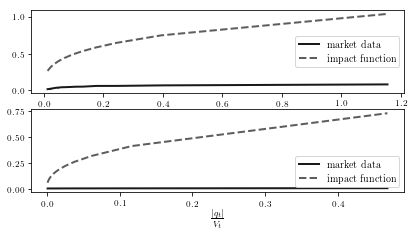

In [44]:
# se lit comme qt trqde -> proba de changement de prix 

fig3, (ax3) = plt.subplots(2, 1, figsize=FIGSIZE)

ax3[0].plot(res_SPMINI.mean_x, res_SPMINI.mean_y, linewidth=2, label ='market data')
ax3[0].plot(res_SPMINI.mean_x, np.power(res_SPMINI.mean_x, alphaGNNPL_SPMINI), linewidth=2, label ='impact function')
ax3[0].set_xlabel(r'$\frac{|q_{t}|}{V_{t}}$', fontsize=13)
ax3[0].legend()

ax3[1].plot(res_UST.mean_x, res_UST.mean_y, linewidth=2, label ='market data')
ax3[1].plot(res_UST.mean_x, np.power(res_UST.mean_x, alphaGNNPL_UST), linewidth=2, label ='impact function')
ax3[1].set_xlabel(r'$\frac{|q_{t}|}{V_{t}}$', fontsize=13)
ax3[1].legend()

plt.savefig('GraphsMD/ImpactFunctionsPL', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

$\underline{\text{Price changing trades analysis:}}$

In [53]:
# curve fitting 
params1, cov = curve_fit(curve_fittingExpo, np.arange(1,max_lag+1), acf_price_changing_trades_SPMINI[1:] )
appro1 = curve_fittingExpo(np.arange(1,max_lag+1), *params1)

params2, cov = curve_fit(curve_fittingExpo, np.arange(1,max_lag+1), acf_price_changing_trades_UST[1:] )
appro2 = curve_fittingExpo(np.arange(1,max_lag+1), *params2)

/opt/research-maintainer/cfm/current/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in exp
/opt/research-maintainer/cfm/current/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in multiply


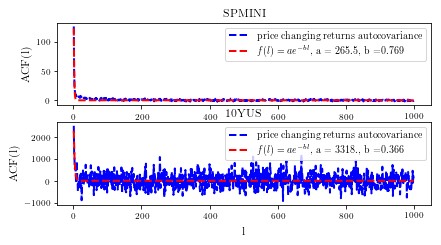

In [56]:
fig1, (ax1) = plt.subplots(2, 1, figsize=FIGSIZE)
ax1[0].plot(np.arange(1,max_lag+1), acf_price_changing_trades_SPMINI[1:], '--b', linewidth=2, label ='price changing returns autocovariance')
ax1[0].plot(np.arange(1,max_lag+1), appro1[:max_lag], '--r', linewidth=2, 
label = r'$f(l) = ae^{-bl}$' + ', a = ' + str(params1[0])[:5] + ', b =' + str(params1[1])[:5] )
ax1[0].set_xlabel('l', fontsize=13)
ax1[0].set_title('SPMINI', fontsize=13)
ax1[0].set_ylabel('ACF(l)', fontsize=13)
ax1[0].legend()



ax1[1].plot(np.arange(1,max_lag+1), acf_price_changing_trades_UST[1:], '--b', linewidth=2, label ='price changing returns autocovariance')
ax1[1].plot(np.arange(1,max_lag+1), appro2[:max_lag], '--r', linewidth=2, 
label = r'$f(l) = ae^{-bl}$' + ', a = ' + str(params2[0])[:5] + ', b =' + str(params2[1])[:5] )
ax1[1].set_xlabel('l', fontsize=13)
ax1[1].set_title('10YUS', fontsize=13)
ax1[1].set_ylabel('ACF(l)', fontsize=13)
ax1[1].legend()

plt.savefig('GraphsMD/PriceChangingACF', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()